In [7]:
import os, glob, sys
import numpy as np
import matplotlib.pylab as plt
import netCDF4 as nc
import dimarray as da
# import cPickle as pickle
# sys.path.append("../")
import settings; reload(settings)
import sealevel.projection as pr; reload(pr)
import sealevel.get_ipcc_data; reload(sealevel.get_ipcc_data)
import sealevel.plotting; reload(sealevel.plotting)

# plot settings
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['font.size'] = 12
plt.rcParams['lines.markeredgewidth'] = 2
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['figure.facecolor'] = "white"

rcpcoldict = {"rcp26": "#2256A6", "rcp45": "#73B2E1", "rcp85": "#EE322D"}

# probabilistic climate need MAGICC ensemble, not openly available.
settings.probablistic_climate = False

In [8]:
# Create the sea level projections by sampling probabilstically 
# from the several sea level functions and their calibrations.

# choose which contributions to project (here as in PNAS 2016 paper)
settings.project_these = ["thermexp", "gic", "gis_smb", "gis_sid", "ant_smb", "ant_sid"]

for scen in settings.scenarios:

    print "scenario", scen

    if settings.probablistic_climate:
        # 600 member ensemble, you need the (non-open) data first
        gmt = mag.magicc_gmt[scen]
    else:
        # single timeseries from IPCC AR5
        gmt = sealevel.get_ipcc_data.tas_data[scen]
        
    pr.project_slr(scen, gmt, settings)

scenario rcp26
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_smb
conribution ant_sid
Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection
scenario rcp45
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_smb
conribution ant_sid
Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection
scenario rcp85
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_smb
conribution ant_sid
Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection


In [9]:
def percentiles(darray,list_of_percentiles):
    pdict = {}
    for p in list_of_percentiles:
        perc = np.percentile(darray.values,p,axis=1)
        pdict[p] = perc
    return pdict

def get_as_dimarray(ncf,variable):

    time = ncf.variables["time"][:]
    runnumber = ncf.variables["runnumber"][:]
    var  = ncf.variables[variable][:]
    dd = da.DimArray(var,dims=["time","runnumber"],
                     axes=[time,runnumber])
    return dd

scenario rcp26
scenario rcp45
scenario rcp85


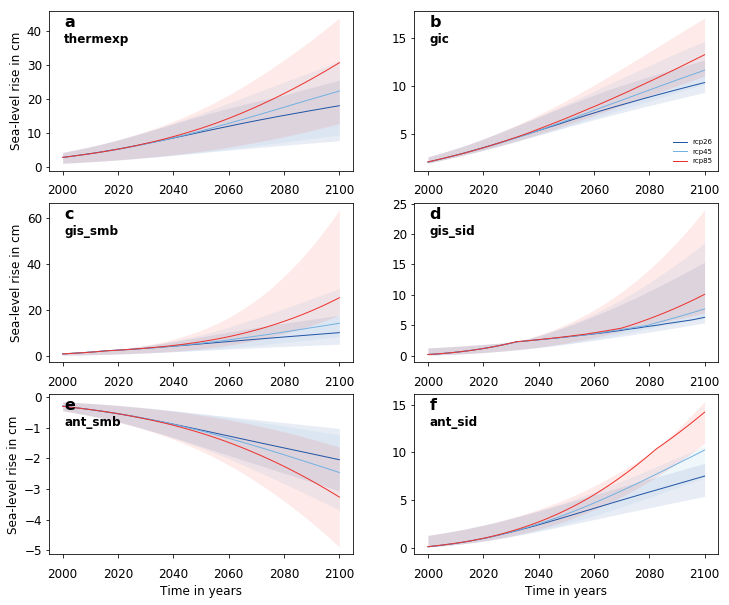

In [10]:
# Components as used in PNAS 2016 paper.
axs = []
for i in range(6):
    axs.append(plt.subplot(3, 2,i+1))

for scen in settings.scenarios:

    print "scenario", scen    

    ncm = nc.Dataset(os.path.join(settings.projected_slr_folder,
                                  "projected_slr_"+scen+"_n"+str(settings.nrealizations)+".nc"),"r")
    for i,contrib in enumerate(settings.project_these):
        ax = axs[i]

        lbl = scen if contrib=="gic" else None
        slr = get_as_dimarray(ncm,contrib)
        pc = percentiles(slr[2000:]*100,[5,50,95]) # in cm
        ax.plot(slr[2000:].time,pc[50],label=lbl,color=rcpcoldict[scen],lw=1)
        ax.fill_between(slr[2000:].time,pc[5],pc[95],color=rcpcoldict[scen],
                        alpha=0.1,lw=0)
    ncm.close()

string = "abcdef"
for i,contrib in enumerate(settings.project_these):
    ax = axs[i]
    ax.text(0.05, 0.9, string[i], transform=ax.transAxes,
    fontdict={'family': 'sans-serif', 'weight': 'bold', "size": 16})
    ax.text(0.05, 0.8, contrib, transform=ax.transAxes,
    fontdict={'family': 'sans-serif', 'weight': 'bold'})
    # ax.set_ylim(0,100)

lgd = axs[1].legend(loc="lower right",fontsize=7,ncol=1)
lgd.get_frame().set_linewidth(0.0)

for ax in axs[-2:]:
    ax.set_xlabel("Time in years")

for ax in [axs[0],axs[2],axs[4]]:
    ax.set_ylabel("Sea-level rise in cm")

In [11]:
# Updated Antarctic component, following Deconto & Pollard 2016.
# This component has been used in Nauels et al. 2017, Environmental Research Letters
# and Mengel et al. Nature Communications, forthcoming.
# This is only for illustration, as the global mean temperature ensembles are not 
# available publicly. 

settings.project_these = ["thermexp", "gic", "gis_smb", "gis_sid", "ant_dp16"]

for scen in settings.scenarios:

    print "scenario", scen

    if settings.probablistic_climate:
        # 600 member ensemble, you need the (non-open) data first
        gmt = mag.magicc_gmt[scen]
    else:
        # single timeseries from IPCC AR5
        gmt = sealevel.get_ipcc_data.tas_data[scen]
        
    pr.project_slr(scen, gmt, settings)

scenario rcp26
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_dp16


../sealevel/contributor_functions.py:326: UserWarning: Global mean temperature does not reach back to 1850,
but Deconto & Pollard Antarctic parametrization needs 1850 temperature.
Using first available temperature as proxy. (Not later than 1880).
  UserWarning)


Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection
scenario rcp45
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_dp16
Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection
scenario rcp85
conribution thermexp
conribution gic
conribution gis_smb
conribution gis_sid
conribution ant_dp16
Sea level projection data written to
/home/sudonim/Documents/Disaster Recovery n Continuity Mgmt/CESM/sealevel/data/projection


scenario rcp26
scenario rcp45
scenario rcp85


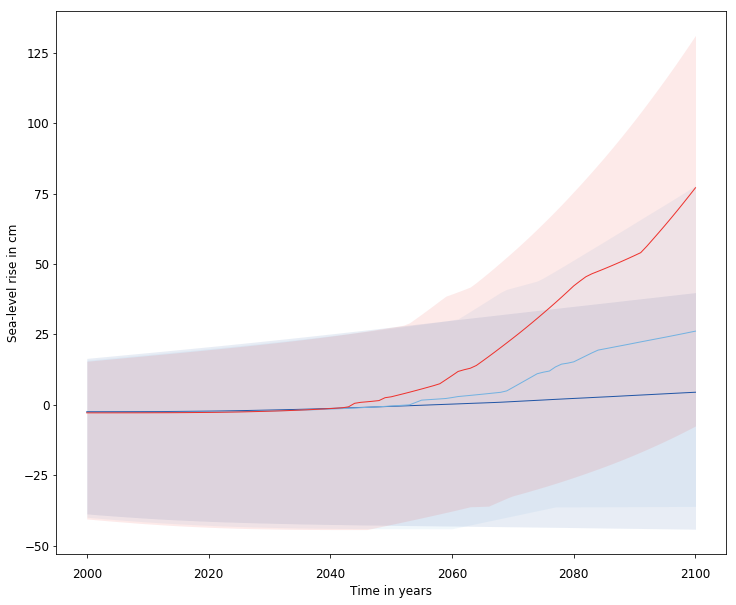

In [7]:
# Plotting the Deconto & Pollard component.

ax = plt.subplot(111)

for scen in settings.scenarios:

    print "scenario", scen    

    ncm = nc.Dataset(os.path.join(settings.projected_slr_folder,
                                  "projected_slr_"+scen+"_n"+str(settings.nrealizations)+".nc"),"r")


    lbl = scen if contrib=="gic" else None
    slr = get_as_dimarray(ncm,"ant_dp16")
    pc = percentiles(slr[2000:]*100,[5,50,95]) # in cm
    ax.plot(slr[2000:].time,pc[50],label=lbl,color=rcpcoldict[scen],lw=1)
    ax.fill_between(slr[2000:].time,pc[5],pc[95],color=rcpcoldict[scen],
                    alpha=0.1,lw=0)
    ncm.close()
    
ax.set_xlabel("Time in years")
ax.set_ylabel("Sea-level rise in cm")